In [1]:
''' !pip install plotly==4.9.0
!pip install jupyterlab "ipywidgets>=7.5"
!jupyter labextension install jupyterlab-plotly@4.9.0
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.9.0
!jupyter lab build '''

!pip install plotly
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
df = dataset.describe(include='all')
display(df)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

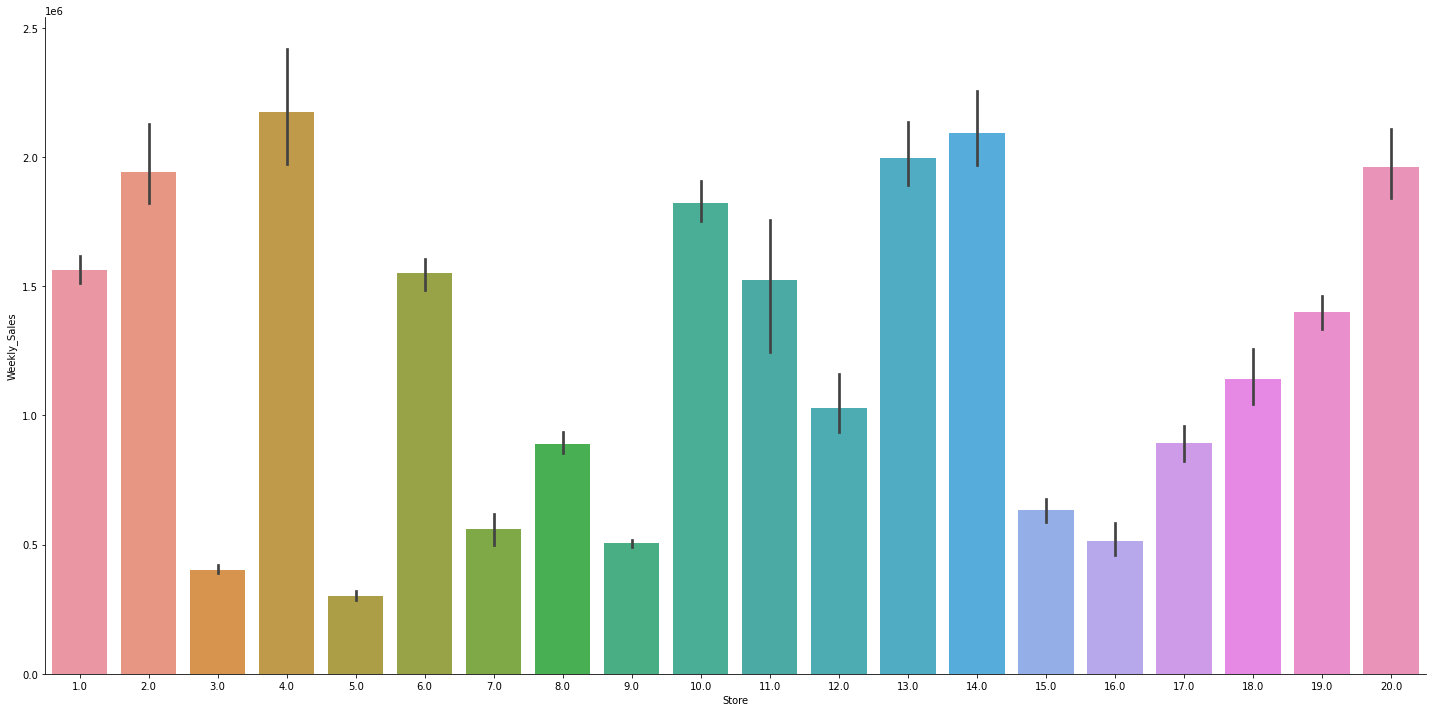

In [4]:
sns.catplot(x= "Store", y= "Weekly_Sales", data= dataset, kind= "bar", height= 10, aspect= 2)

### Nous pouvons constater que les magasins 2,4,10,13,14 et 20 ont tendance à avoir des ventes hebdomadaires moyennes plus élevées que les autres.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Temperature'>

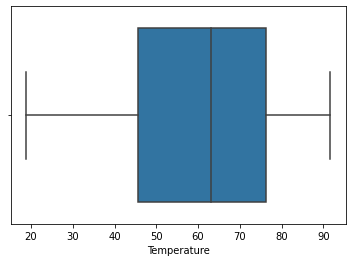

In [5]:
sns.boxplot(dataset['Temperature'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Fuel_Price'>

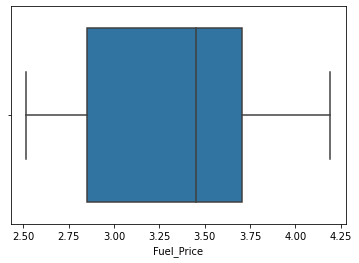

In [6]:
sns.boxplot(dataset['Fuel_Price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CPI'>

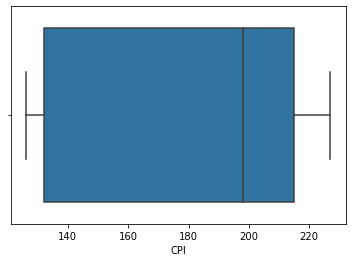

In [7]:
sns.boxplot(dataset['CPI'])

### Nous remarquons que la variable "CPI" a une bonne distribution.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Unemployment'>

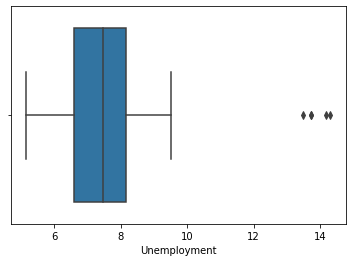

In [8]:
sns.boxplot(dataset['Unemployment'])

### Nous constatons que la variable "Chômage" est bien répartie.

### - Création de nouvelles colonnes, à partir de la colonne Date, contenant les caractéristiques numériques suivantes :

In [9]:
dataset['Day'] = pd.DatetimeIndex(dataset['Date']).day  
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['Weekday'] = pd.DatetimeIndex(dataset['Date']).weekday

/opt/conda/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning:

Parsing '18-02-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/opt/conda/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning:

Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/opt/conda/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning:

Parsing '27-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/opt/conda/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning:

Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/opt/conda/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning:

Parsing '19-08-2011' in DD/MM/YYYY format. Provide format or 

### La variable cible (Y) correspond à la colonne : Weekly_Sales

### Supression des valeurs des lignes manquantes dans : Weekly_Sales

### Des transformations spécifiques à prévoir sur : Date

### Suprimer ou créer de nouvelles colonnes de la variable Date contenant : 
                                                                
                                                         année / mois /jour / jour de la semaine
                                                         year / month / day / day of week
                                                                        
### Suprimer les valeurs des lignes contenant des valeurs invalides ou aberrantes : 
                                                                                    
                                                         Température / Prix_du_carburant / IPC et Chômage
                                                         Temperature / Fuel_price / CPI and Unemployment 
                                                                                


### Supression des lignes de l'ensemble de données pour lesquelles la valeur dans Weekly_Sales est manquante.

In [10]:
index_with_nan = dataset.index[dataset.iloc[:,2].isnull()]
dataset.drop(index_with_nan,0, inplace=True)
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Percentage of missing values: 


/tmp/ipykernel_1236/3926183873.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
Day             13.235294
Month           13.235294
Year            13.235294
Weekday         13.235294
dtype: float64

In [11]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

Number of rows : 136



### Supression de la colonne Date de l'ensemble de données.

In [12]:
useless_cols = ['Date']

print("Dropping useless columns...")
dataset = dataset.drop(useless_cols, axis=1)
print("Display of dataset: ")
display(dataset.head())
print()

Dropping useless columns...
Display of dataset: 


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Weekday
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18.0,2.0,2011.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25.0,3.0,2011.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28.0,5.0,2010.0,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,28.0,5.0,2010.0,4.0


In [13]:
print("Basics statistics: ")
df = dataset.describe(include='all')
display(df)
print()

Basics statistics: 


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Weekday
count,136.000000,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000,118.000000,118.000000,118.000000,118.000000
mean,10.014706,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.665582,15.949153,6.830508,2010.822034,3.771186
std,6.124614,6.474630e+05,0.259528,18.514432,0.479540,40.243105,1.619428,8.687202,3.395082,0.812628,1.283765
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,1.000000,1.000000,2010.000000,0.000000
25%,4.000000,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000,8.000000,4.000000,2010.000000,4.000000
50%,10.000000,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000,16.500000,6.000000,2011.000000,4.000000
75%,15.250000,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.150000,24.000000,10.000000,2011.750000,4.000000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000,31.000000,12.000000,2012.000000,6.000000


<AxesSubplot:>

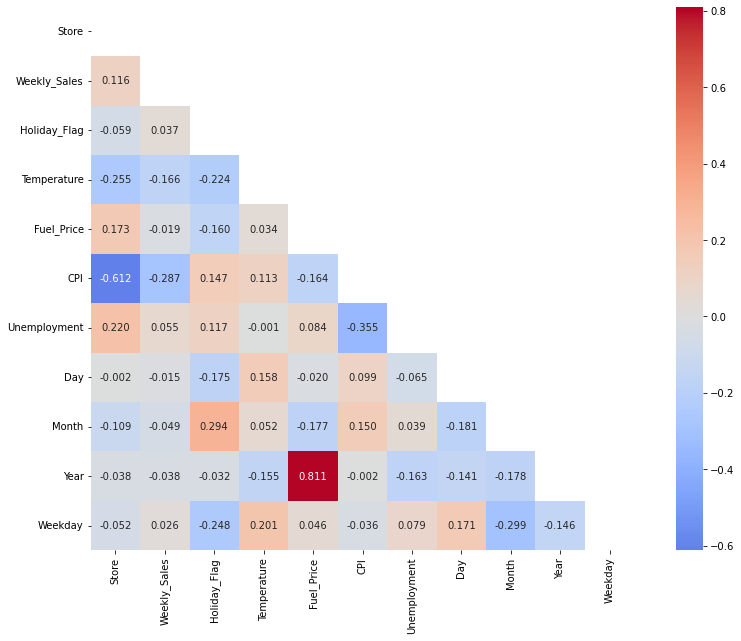

In [14]:
f, ax= plt.subplots(figsize= (15, 10))

corr= dataset.corr(method='pearson')

mask= np.triu(np.ones_like(corr, dtype= bool))

sns.heatmap(corr, 
               mask= mask,
               cmap='coolwarm', 
               annot=True, 
               center= 0, 
               fmt= '.3f',
               square= True)

<AxesSubplot:>

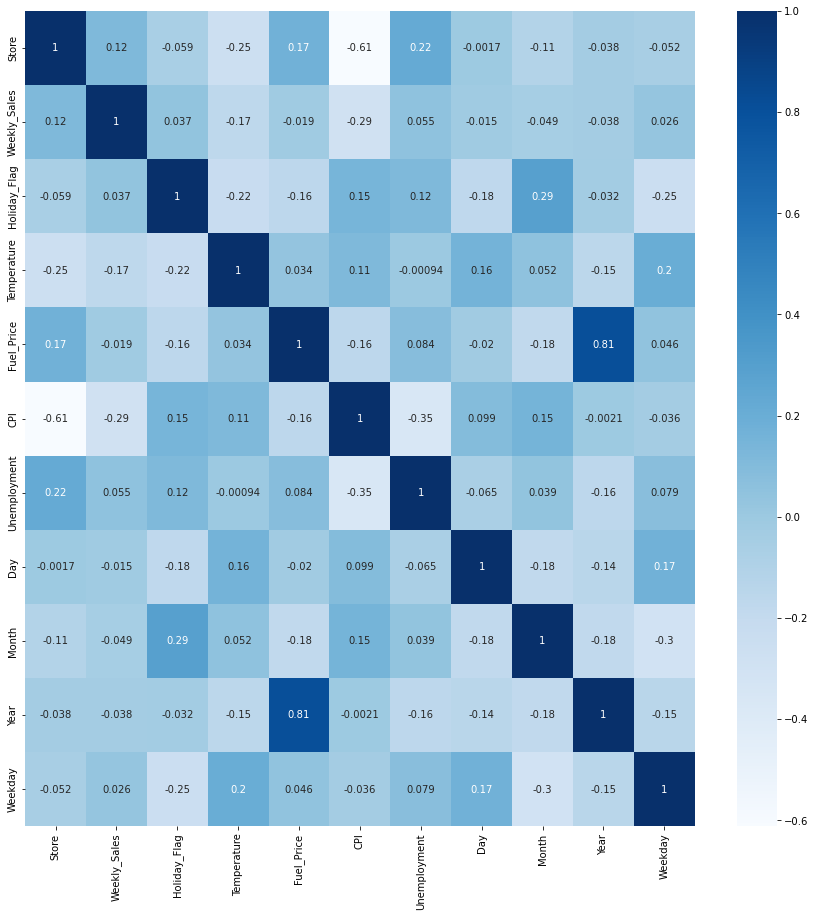

In [15]:
plt.figure(figsize=(15, 15))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='Blues',
        xticklabels=corr,
        yticklabels=corr)

### Apparemment, il n'y a pas de corrélation très forte entre la variable cible et les autres variables.

### Mais "Fuel_price" et "year" sont correlés. Peut-être faut-il suprimer la colonne "Fuel_price" ?

In [16]:
dataset['Holiday_Flag'].unique()

array([nan,  0.,  1.])

##### L'indice des prix à la consommation - CPI
Qu'est-ce que l'indice des prix à la consommation - CPI ?
L'indice des prix à la consommation (IPC) est une mesure qui examine la moyenne pondérée des prix d'un panier de biens et services de consommation, tels que les transports, l'alimentation et les soins médicaux. Il est calculé en prenant les variations de prix de chaque article du panier de biens prédéterminé et en en faisant la moyenne. Les variations de l'IPC sont utilisées pour évaluer les changements de prix associés au coût de la vie ; l'IPC est l'une des statistiques les plus fréquemment utilisées pour identifier les périodes d'inflation ou de déflation.


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619:

<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

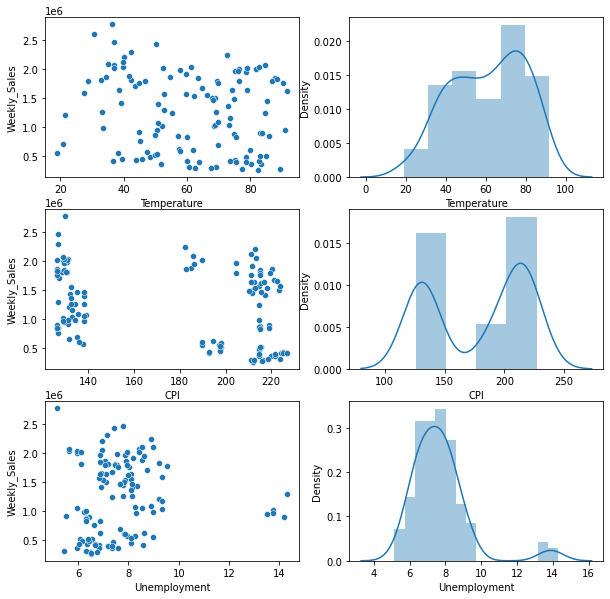

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.scatterplot('Temperature','Weekly_Sales',data=dataset)
plt.subplot(3,2,2)
sns.distplot(dataset['Temperature'])
plt.subplot(3,2,3)
sns.scatterplot('CPI','Weekly_Sales',data=dataset)
plt.subplot(3,2,4)
sns.distplot(dataset['CPI'])
plt.subplot(3,2,5)
sns.scatterplot('Unemployment','Weekly_Sales',data=dataset)
plt.subplot(3,2,6)
sns.distplot(dataset['Unemployment'])

In [18]:
# Univariate analysis
from plotly.subplots import make_subplots

# Distribution of each numeric variable
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Store', 'Holiday_Flag','Day','Month','Year','Weekday']
fig1 = make_subplots(rows = len(num_features), cols = 1, subplot_titles = num_features)
for i in range(len(num_features)):
    fig1.add_trace(
        go.Histogram(
            x = dataset[num_features[i]], nbinsx = 4),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of quantitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=900)
fig1.show()

In [19]:

# Univariate analysis
from plotly.subplots import make_subplots

# Barplot of each qualitative variable
cat_features = ['Store', 'Holiday_Flag']
fig2 = make_subplots(rows = len(cat_features), cols = 1, subplot_titles = cat_features)
for i in range(len(cat_features)):
    
    x_coords = dataset[cat_features[i]].value_counts().index.tolist()
    y_coords = dataset[cat_features[i]].value_counts().tolist()
    
    fig2.add_trace(
        go.Bar(
            x = x_coords,
            y = y_coords),
        row = i + 1,
        col = 1)
fig2.update_layout(
        title = go.layout.Title(text = "Barplot des variables qualitative", x = 0.5), showlegend = False, 
            autosize=False, height=500)
fig2.show()

### Suppression des valeurs invalides ou des valeurs aberrantes des colonnes : Température , Fuel_price , CPI et Unemployment qui ne sont pas dans l'intervale de + ou -3 écarts types.

In [20]:
mask1 = (dataset['Temperature'] < dataset['Temperature'].mean() + 2*dataset['Temperature'].std())
mask1=(dataset['Temperature'] > dataset['Temperature'].mean() - 2*dataset['Temperature'].std())
dataset = dataset.loc[mask1,:]

mask2 = (dataset['Fuel_Price'] < dataset['Fuel_Price'].mean() + 2*dataset['Fuel_Price'].std()) 
mask2=(dataset['Fuel_Price'] > dataset['Fuel_Price'].mean() - 2*dataset['Fuel_Price'].std())
dataset = dataset.loc[mask2,:]

mask3 = (dataset['CPI'] < dataset['CPI'].mean() + 2*dataset['CPI'].std()) 
mask3=(dataset['CPI'] > dataset['CPI'].mean() - 2*dataset['CPI'].std())
dataset = dataset.loc[mask3,:]

mask4 = (dataset['Unemployment'] < dataset['Unemployment'].mean() + 2*dataset['Unemployment'].std()) 
mask4=(dataset['Unemployment'] > dataset['Unemployment'].mean() - 2*dataset['Unemployment'].std())
dataset = dataset.loc[mask4,:]

In [21]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

Number of rows : 92



In [22]:
dataset.isna().sum()

Store            0
Weekly_Sales     0
Holiday_Flag    10
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
Day              9
Month            9
Year             9
Weekday          9
dtype: int64

In [23]:
dataset.isna().sum().sort_values(ascending = False)

Holiday_Flag    10
Day              9
Month            9
Year             9
Weekday          9
Store            0
Weekly_Sales     0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
dtype: int64

### Séparation de la variable cible Y : 'Weekly_Sales' et des autres feactures.

In [24]:
target_variable = "Weekly_Sales"
Y = dataset.loc[:,target_variable]
X = dataset.loc[:,[c for c in dataset.columns if c!=target_variable]]
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Weekday
0,6.0,NaN,59.61,3.045,214.777523,6.858,18.0,2.0,2011.0,4.0
1,13.0,0.0,42.38,3.435,128.616064,7.470,25.0,3.0,2011.0,4.0
4,6.0,0.0,78.89,2.759,212.412888,7.092,28.0,5.0,2010.0,4.0
6,15.0,0.0,69.80,4.069,134.855161,7.658,6.0,3.0,2011.0,6.0
7,20.0,0.0,39.93,3.617,213.023622,6.961,2.0,3.0,2012.0,4.0


In [25]:
Y

0      1572117.54
1      1807545.43
4      1644470.66
6       695396.19
7      2203523.20
          ...    
139     532739.77
143     396968.80
144     424513.08
145    2248645.59
149    1255087.26
Name: Weekly_Sales, Length: 92, dtype: float64

In [26]:
# pour voir ci aucune feature est correler entre elle a plus de 0.80
corr = X.corr()
high_corr = corr > 0.82
high_corr_list = [(i,j) for i in range(corr.shape[0]) for j in range(corr.shape[0]) if i != j and high_corr.iloc[i,j]]
high_corr_list

[(3, 8), (8, 3)]

In [27]:
dataset.dtypes 

Store           float64
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Day             float64
Month           float64
Year            float64
Weekday         float64
dtype: object

# preprocessing avec sklearn

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

...Done.



In [29]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

...Done
[[1.80000000e+01 0.00000000e+00 7.36700000e+01 2.79200000e+00
  1.32614193e+02 9.34200000e+00 8.00000000e+00 6.00000000e+00
  2.01000000e+03 1.00000000e+00]
 [1.80000000e+01 0.00000000e+00 5.20200000e+01 2.87800000e+00
  1.32763355e+02 9.33100000e+00 1.50000000e+01 1.00000000e+01
  2.01000000e+03 4.00000000e+00]
 [7.00000000e+00            nan 5.76000000e+01 3.48500000e+00
  1.94379637e+02 8.62200000e+00 2.60000000e+01 8.00000000e+00
  2.01100000e+03 4.00000000e+00]
 [1.30000000e+01 0.00000000e+00 7.59500000e+01 3.60600000e+00
  1.29201581e+02 6.87700000e+00 8.00000000e+00 1.20000000e+01
  2.01100000e+03 3.00000000e+00]
 [5.00000000e+00 0.00000000e+00 6.91700000e+01 3.59400000e+00
  2.24019287e+02 5.42200000e+00 1.90000000e+01 1.00000000e+01
  2.01200000e+03 4.00000000e+00]]
[[6.00000000e+00 0.00000000e+00 7.88900000e+01 2.75900000e+00
  2.12412888e+02 7.09200000e+00 2.80000000e+01 5.00000000e+00
  2.01000000e+03 4.00000000e+00]
 [1.30000000e+01 0.00000000e+00 6.11100000e+01 3.

###  Variables catégorielles :
         #### Store, Holiday_Flag [0,1]                                 *valeur manquante [1]
###  Variables numériques : 
         #### Température, Fuel_Price, CPI, Unemployment [2,3,4,5]      (*valeur manquante [3,4,5]  FAUX)

In [30]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Weekday']  at positions  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Found categorical features  []  at positions  []


In [31]:
# déscription / déclartion de ce que l'on veut faire donc remplacé les variables quantiatif par la moyen de sa colonne

numeric_features = [2,3,4,5,6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
     ])    

categorial_features = [0,1]
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first'))
         ])

In [32]:
# déscription / déclartion  général pour réunir toute la table : les colonnes quantitatif 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ])

In [33]:
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print(X_train[0:5,:])
print()

print(X_test[0:5,:])
X_test = preprocessor.transform(X_test)
print(X_test[0:5,:])

[[1.80000000e+01 0.00000000e+00 7.36700000e+01 2.79200000e+00
  1.32614193e+02 9.34200000e+00 8.00000000e+00 6.00000000e+00
  2.01000000e+03 1.00000000e+00]
 [1.80000000e+01 0.00000000e+00 5.20200000e+01 2.87800000e+00
  1.32763355e+02 9.33100000e+00 1.50000000e+01 1.00000000e+01
  2.01000000e+03 4.00000000e+00]
 [7.00000000e+00            nan 5.76000000e+01 3.48500000e+00
  1.94379637e+02 8.62200000e+00 2.60000000e+01 8.00000000e+00
  2.01100000e+03 4.00000000e+00]
 [1.30000000e+01 0.00000000e+00 7.59500000e+01 3.60600000e+00
  1.29201581e+02 6.87700000e+00 8.00000000e+00 1.20000000e+01
  2.01100000e+03 3.00000000e+00]
 [5.00000000e+00 0.00000000e+00 6.91700000e+01 3.59400000e+00
  2.24019287e+02 5.42200000e+00 1.90000000e+01 1.00000000e+01
  2.01200000e+03 4.00000000e+00]]
[[ 0.69224059 -1.10459765 -1.10948941  0.96704968 -1.01098435 -0.20861301
  -1.094465   -2.22198746  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.   

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [35]:
Y_train_pred = regressor.predict(X_train)

print(Y_train_pred[0:5])

[1143522.27357755 1144444.80848007  489659.90076497 2042258.23917724
  432499.63425848]


In [36]:
Y_test_pred = regressor.predict(X_test)

print(Y_test_pred[0:5])

[1586366.11853389 1993839.76503125  270864.47277367 1394290.8459702
  210605.84428211]


In [37]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))


R2 score on training set :  0.9761362425644379
R2 score on test set :  0.986314836101161


### Le modèle est parfait : il n'y a pas besoin de régularisation d'ajustement excessif. En effet, avec ce modèle sans régularisation, nous obtenons un score R2 de test supérieur à 0,9.
### Mais, nous allons comme même le faire pour comparer les résultats pour voir si le score s'améliore.

### Affichage des coefficients de chacune des variables explicatives.

In [38]:
coef_transf = regressor.coef_
coef_transf

array([  -25556.8521058 ,   -78880.50160444,   821941.36215651,
         -46228.44348101,   -39092.59397296,    23015.6759213 ,
         -21740.26435828,    -5914.62858165,   259224.76767366,
       -1316145.72336401,  2389357.90118983, -1294450.11978158,
          43803.67045995,  -557039.3970594 ,  -792891.89974682,
       -1199961.635801  ,  2093728.55018544,    15579.65581496,
        1460791.62554283,  2209663.00956662,  1139158.62670084,
         821942.31572767,  -611910.37438033,   964253.98802383,
        1176013.55289361,  1532981.30671435,   572401.16128217,
        -108095.69546712])

In [39]:
cat_featnames = list(preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names(['Store', 'Holiday_Flag']))
cat_featnames

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['Store_2.0',
 'Store_3.0',
 'Store_4.0',
 'Store_5.0',
 'Store_6.0',
 'Store_7.0',
 'Store_8.0',
 'Store_9.0',
 'Store_10.0',
 'Store_11.0',
 'Store_12.0',
 'Store_13.0',
 'Store_14.0',
 'Store_15.0',
 'Store_16.0',
 'Store_17.0',
 'Store_18.0',
 'Store_19.0',
 'Store_20.0',
 'Holiday_Flag_1.0']

In [48]:
columns = cat_featnames + ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Weekday']

### Créeation d'un Dataframe dans lequel nous aurons les colonnes qui se réfèrent au bons coefficients.

In [49]:
coef = pd.DataFrame(index = columns)
coef['coef_regressor'] = regressor.coef_.transpose()
coef.apply(lambda x : abs(x)).sort_values(by="coef_regressor", ascending=False)

,coef_regressor
Store_12.0,2.389358e+06
Holiday_Flag_1.0,2.209663e+06
Store_18.0,2.093729e+06
Month,1.532981e+06
Store_20.0,1.460792e+06
Store_11.0,1.316146e+06
Store_13.0,1.294450e+06
Store_17.0,1.199962e+06
Day,1.176014e+06
Temperature,1.139159e+06


### Les variables explicatives les plus influentes sont Store_12.0, Holiday_Flag_1.0 et Store_18.0.

### En général, on évite de regarder les coefficients pour déterminer l'importance des caractéristiques. On utilisera plutôt autre chose que "f_regression".

In [45]:
from sklearn.model_selection import cross_val_score, GridSearchCV

#Cross validation score

regressor = LinearRegression() 
regressor.fit(X_train, Y_train)

score_train = cross_val_score(regressor,X_train, Y_train, cv=3)
score_test = cross_val_score(regressor,X_test, Y_test, cv=3)
#F1 score

print("cross validated r2-score on train set : {} ".format(score_train.mean()))
print("cross validated r2-score on test set : {} ".format(score_test.mean()))

cross validated r2-score on train set : 0.8013146989046751 
cross validated r2-score on test set : -16.970386822120663 


In [42]:
# Perform Ridge Regressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Ridge Regressor
regressor1 = Ridge(alpha=0.5)
regressor1.fit(X_train, Y_train)

r2_scores_train = regressor1.score(X_train, Y_train)
r2_scores_test = regressor1.score(X_test, Y_test)

print('Ridge -> The R2 score on train set is : ', r2_scores_train)
print('Ridge -> The R2 score on test set is : ', r2_scores_test)

#----------------------------------------------------------------------------------------------------

#Lasso Regressor
regressor = Lasso(alpha=0.5)
regressor.fit(X_train, Y_train)

r2_scores_train = regressor.score(X_train, Y_train)
r2_scores_test = regressor.score(X_test, Y_test)

print('Lasso -> The R2 score on train set is : ', r2_scores_train)
print('Lasso -> The R2 score on test set is : ', r2_scores_test)

Ridge -> The R2 score on train set is :  0.955194445879265
Ridge -> The R2 score on test set is :  0.9545635856918482
Lasso -> The R2 score on train set is :  0.9756516043151634
Lasso -> The R2 score on test set is :  0.9862905707584833


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.213e+11, tolerance: 3.467e+09



In [43]:
# Cross validation with Ridge regularization
print("3-fold cross-validation...")
regressor1 = Ridge(alpha=0.5)
scores_train = cross_val_score(regressor1, X_train, Y_train, cv=4)
scores_test = cross_val_score(regressor1, X_test, Y_test, cv=4)

print('The cross-validated train R2-score is : ', scores_train.mean())
print('The cross-validated test R2-score is : ', scores_test.mean())

3-fold cross-validation...
The cross-validated train R2-score is :  0.8514882244810769
The cross-validated test R2-score is :  -27.439508733025797


In [44]:
# Cross validation with Lasso regularization x Grid search

print("Grid search...")
regressor1 = Ridge()

# Grid of values to be tested

params = {
    'alpha': [0.2,50 , 0.5, 1 ,20]           # Au delà de 1 : le score ne s'améliore pas
}
gridsearch = GridSearchCV(regressor1, param_grid = params, cv = 4)   # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print()

grid_fit = gridsearch.fit(X_train, Y_train)
print('Train score for the best model : ', grid_fit.best_estimator_.score(X_train,Y_train))
print('Test score for the best model : ', grid_fit.best_estimator_.score(X_test,Y_test))

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.2}

Train score for the best model :  0.9697378774534671
Test score for the best model :  0.9761039334213661
